# Problem Statement:-

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop
 an algorithm that predicts the number of wins for a given team in the 2015 season 
based on several different indicators of success. There are 16 different features that 
will be used as the inputs to the machine learning and the output will be a value that 
represents the number of wins. 

-- Input features: 

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, 
Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

## Importing Modules:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Loading Data:-

In [2]:
df=pd.read_csv("baseball.csv")
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
df.shape

(30, 17)

There are 30 rows and 17 columns in the Dataset.

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Checking for Null Values:-

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can see that there is no null values in any column of the dataset.

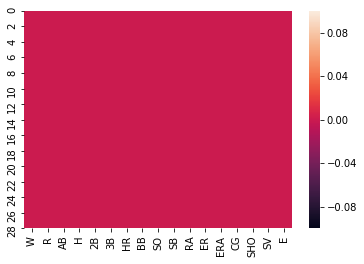

In [7]:
sns.heatmap(df.isnull())
plt.show()

# EDA:-

## We will do the EDA for the target variable.

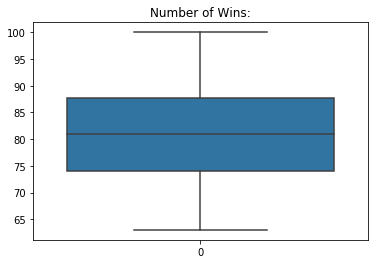

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64


In [8]:
plt.title("Number of Wins:")
sns.boxplot(data=df.W)
plt.show()
print(df.W.describe())

We can see that the targer variable has a mean value of 81 and minimum no. of wins are 63 whereas the maximum number of wins is 100 and we can observe that their is no Outlier in the target column.

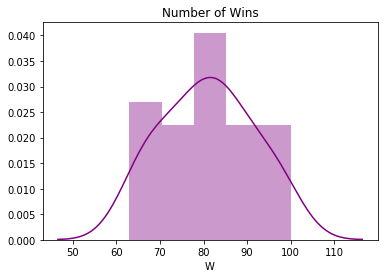

In [9]:
plt.title("Number of Wins")
sns.distplot(df.W,kde='True',color='purple')
plt.show()

We can see that the curve plotted is a Normally Distributed Curve.

## Now we will do EDA for the independent variable:-

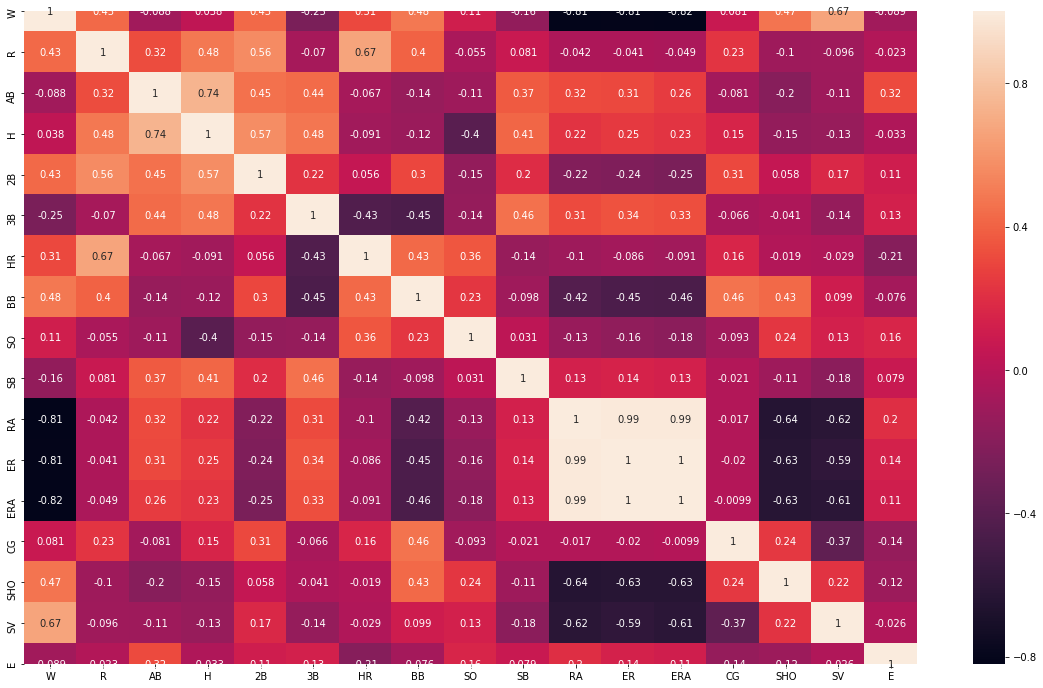

In [10]:
plt.figure(figsize=(20,12))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
corr["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

We can observe that their are various weak relationship with the target variable.

## We will check for the Linear Correlation of the Independent Variables with Target Variable:-

In [27]:
import scipy
from scipy.stats.stats import pearsonr

In [15]:
p1 = df['R']
p2 = df['AB']
p3 = df['H']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Runs:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and At Bats:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Hits:', pearson_coeff*100,'%')


 Coeffiecient of correlation between Win and Runs: 43.07505325312718 %

 Coeffiecient of correlation between Win and At Bats: -8.794663528380916 %

 Coeffiecient of correlation between Win and Hits: 3.76124441229925 %


In [16]:
p1 = df['2B']
p2 = df['3B']
p3 = df['HR']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Doubles:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Triples:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Runs:', pearson_coeff*100,'%')


 Coeffiecient of correlation between Win and Doubles: 42.77968699590266 %

 Coeffiecient of correlation between Win and Triples: -25.111772827491546 %

 Coeffiecient of correlation between Win and Home Runs: 30.740737737257195 %


In [17]:
p1 = df['BB']
p2 = df['SO']
p3 = df['SB']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Walks:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Strikeouts:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Stolen Bases:', pearson_coeff*100,'%')


 Coeffiecient of correlation between Win and Walks: 48.43416952504984 %

 Coeffiecient of correlation between Win and Strikeouts: 11.184973144299864 %

 Coeffiecient of correlation between Win and Home Stolen Bases: -15.723407818337542 %


In [51]:
p1 = df['RA']
p2 = df['ER']
p3 = df['ERA']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Runs Allowed:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Earned Runs:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Earned Run Average:', pearson_coeff*100,'%')


 Coeffiecient of correlation between Win and Runs Allowed: -81.29519004236909 %

 Coeffiecient of correlation between Win and Earned Runs: -80.943475207634 %

 Coeffiecient of correlation between Win and Home Earned Run Average: -81.9599712315947 %


In [19]:
p1 = df['SHO']
p2 = df['SV']
p3 = df['E']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Shutouts:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Saves:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Error:', pearson_coeff*100,'%')


 Coeffiecient of correlation between Win and Shutouts: 47.18051614896541 %

 Coeffiecient of correlation between Win and Saves: 66.65296188226412 %

 Coeffiecient of correlation between Win and Home Error: -8.948461968513527 %


By Looking at all these correlation coefficient we can see that there are positive as well as negative correlation with the target column . And Some are very least correlated with the target varibale so we will remove them for better model building and prediction.

# Checking For Skewness:- 

In [20]:
df_new = df.drop(['AB', 'H', '3B', 'HR', 'SO', 'SB', 'E'], axis=1)

W      0.047089
R      1.200786
2B    -0.230650
BB     0.158498
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
dtype: float64


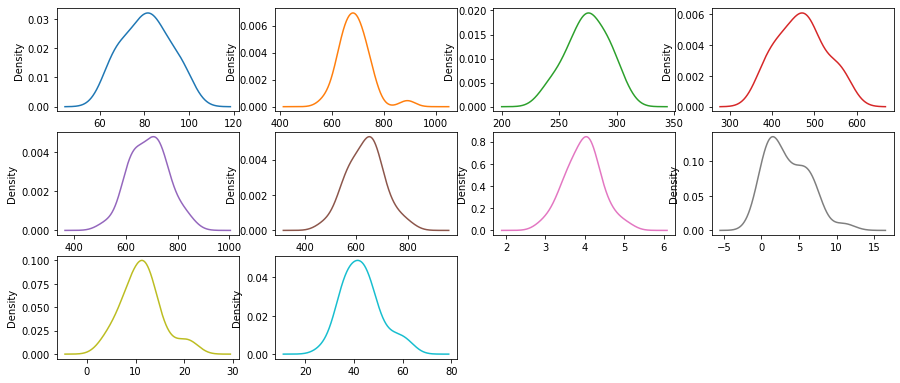

In [24]:
print(df_new.skew())
df_new.plot(kind='density',subplots=True,layout=(5,4),sharex=False,legend=False,figsize=(15,11))
plt.show()

# Checking for Outliers.

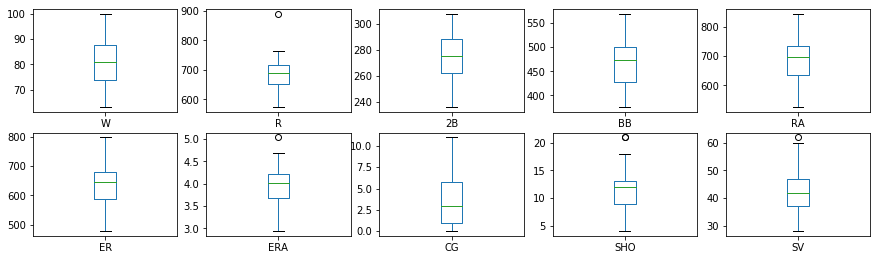

In [25]:
df_new.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

By Observing this we can see that the R,ERA,SHO,SV columns has Outliers but the Outliers of ERA,SHO,SV are very close to the whiskers so we will not remove it and only treat the outlier in the R column.

In [32]:
from scipy.stats import stats
Q1 = np.percentile(df_new['R'], 25, interpolation='midpoint')
Q3 = np.percentile(df_new['R'], 75, interpolation='midpoint')

IQR = stats.iqr(df_new['R'], interpolation='midpoint')
print("InterQuartile Range: ",IQR)

ulim = Q3+1.5*IQR
llim = Q1-1.5*IQR

print("Upper Limit:", ulim)
print("Lower Limit:", llim)

InterQuartile Range:  64.0
Upper Limit: 812.5
Lower Limit: 556.5


In [34]:
outliers = []
for x in df_new['R']:
    if((x > ulim) or (x < llim)):
        outliers.append(x)

print(outliers)
print('Number of outliers present in R column:', len(outliers))

[891]
Number of outliers present in R column: 1


In [35]:
value=df_new['R'].median()
df_new['R']=np.where(df_new['R']==891,value,df_new['R'])

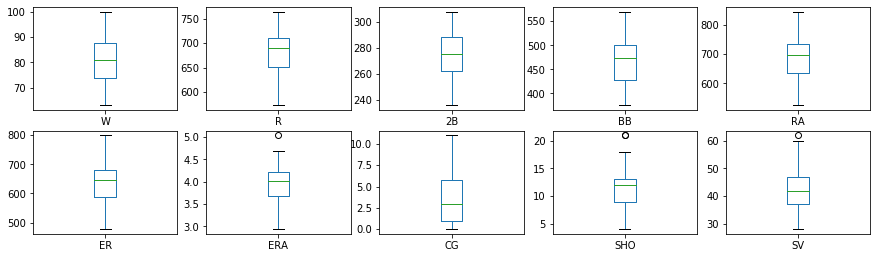

In [36]:
df_new.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

Now the Outliers are Removed Now we will check for the best model.

<Figure size 1440x360 with 0 Axes>

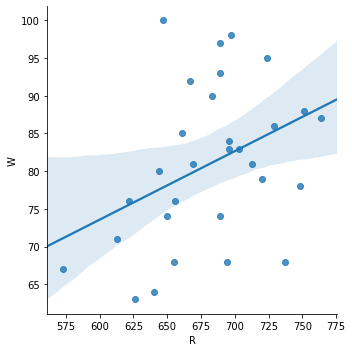

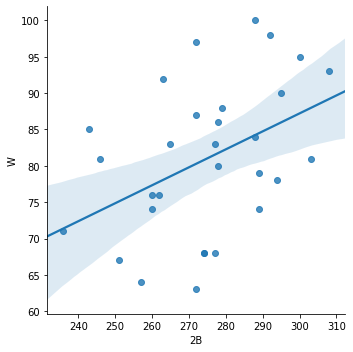

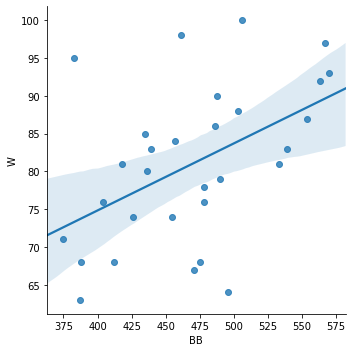

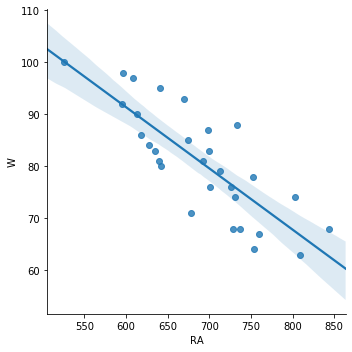

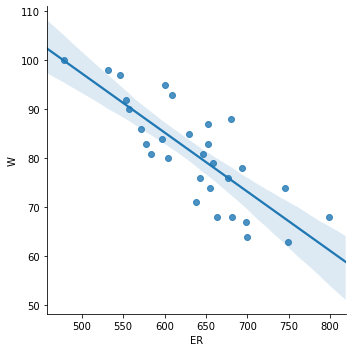

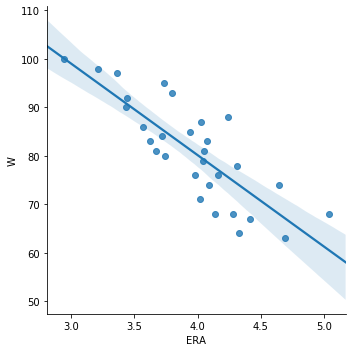

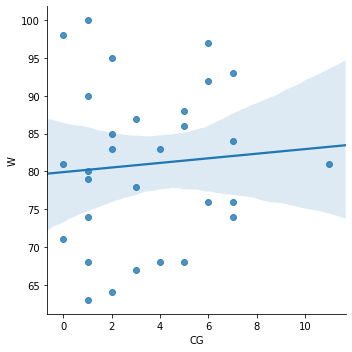

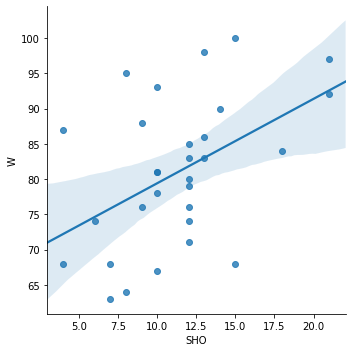

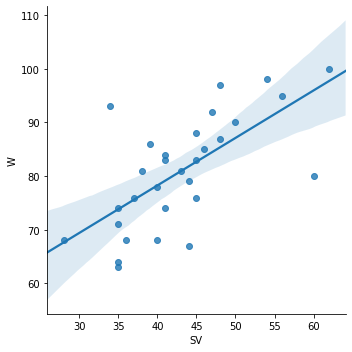

In [37]:
plt.figure(figsize=(20, 5))
sns.lmplot(data=df_new, x='R', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='2B', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='BB', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='RA', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='ER', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='ERA', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='CG', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='SHO', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='SV', y='W', fit_reg=True)

# Creating train_test_split

In [38]:
x=df.drop('W',axis=1)
y=df['W']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=28)

In [40]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -306.531628 (213.969188)
ScaledLasso: -22.113617 (19.157382)
ScaledEN: -27.703320 (23.599094)
ScaledKNN: -54.486000 (47.777280)
ScaledCART: -79.950000 (32.484188)
ScaledGBM: -76.639886 (45.035945)


In [41]:
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
param_grid = dict()
param_grid['alpha'] = np.arange(0, 1, 0.01)
param_grid['selection'] = ['cyclic', 'random']
model = Lasso()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-205.488846 (201.095575) with: {'alpha': 0.0, 'selection': 'cyclic'}
-182.656491 (189.814018) with: {'alpha': 0.0, 'selection': 'random'}
-137.004598 (150.271563) with: {'alpha': 0.01, 'selection': 'cyclic'}
-131.758106 (147.726177) with: {'alpha': 0.01, 'selection': 'random'}
-105.131037 (118.484934) with: {'alpha': 0.02, 'selection': 'cyclic'}
-106.222870 (121.787281) with: {'alpha': 0.02, 'selection': 'random'}
-90.227526 (101.837657) with: {'alpha': 0.03, 'selection': 'cyclic'}
-90.515675 (102.290599) with: {'alpha': 0.03, 'selection': 'random'}
-76.528650 (85.255574) with: {'alpha': 0.04, 'selection': 'cyclic'}
-74.938848 (84.940938) with: {'alpha': 0.04, 'selection': 'random'}
-62.878467 (73.192164) with: {'alpha': 0.05, 'selection': 'cyclic'}
-62.975996 (73.220608) with: {'alpha': 0.05, 'selection': 'random'}
-53.872036 (64.038067) with: {'alpha': 0.06, 'selection': 'cyclic'}
-53.823835 (63.814734) with: {'alpha': 0.06, 'selection': 'random'}
-46.502857 (56.931857) with: {'alpha

Text(0, 0.5, 'Predcited Values')

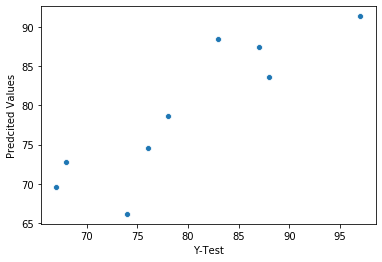

In [42]:
l = Lasso(alpha=0.29, selection='random')
l.fit(x_train, y_train)
pred = l.predict(x_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

In [46]:
pred=l.predict(x_test)
predictions=pd.DataFrame({'Predictions':pred,'Real Value':y_test})
predictions

,Predictions,Real Value
9,78.680985,78
10,83.576737,88
21,88.436735,83
23,69.604350,67
13,74.567436,76
4,66.184979,74
17,91.318563,97
18,72.730626,68
6,87.405415,87


# Saving our Model:-

In [48]:
import joblib
joblib.dump(l, 'baseball.obj')

['baseball.obj']

# Loading the saved model:-

In [49]:
save = joblib.load('baseball.obj')
prediction = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

Mean Absolute Error: 3.690043881334857
Mean Squared Error: 19.368713061615704
Root Mean Squared Error: 4.400990009261064


In [50]:
prediction

array([78.68098536, 83.57673713, 88.43673495, 69.60435031, 74.56743648,
       66.18497898, 91.31856328, 72.73062559, 87.40541457])